# Example 1-1 
### Training and running a linear model using Scikit_learn

In [2]:
import matplotlib

import matplotlib.pyplot as plt

import numpy as np

import pandas as pd

from pandas import read_csv

import sklearn

In [3]:
#Load data 

oecd_bli = pd.read_csv("C:\\Users\\Owner\\Desktop\\Learning\\coding\\9.Hands-On_machine_learning\\datasets\\lifesat\\oecd_bli_2015.csv")

gdp_per_capita= pd.read_csv("C:\\Users\\Owner\\Desktop\\Learning\\coding\\9.Hands-On_machine_learning\\datasets\\lifesat\\gdp_per_capita.csv",thousands=',',delimiter='\t', encoding = 'latin1', na_values="n/a")

   

In [4]:
oecd_bli = oecd_bli[oecd_bli['INEQUALITY']=="TOT"]
oecd_bli = oecd_bli.pivot(index="Country", columns = "Indicator", values = "Value")
oecd_bli.head(2)


#oecd_bli =oecd_bli.pivot(in)

Indicator,Air pollution,Assault rate,Consultation on rule-making,Dwellings without basic facilities,Educational attainment,Employees working very long hours,Employment rate,Homicide rate,Household net adjusted disposable income,Household net financial wealth,...,Long-term unemployment rate,Personal earnings,Quality of support network,Rooms per person,Self-reported health,Student skills,Time devoted to leisure and personal care,Voter turnout,Water quality,Years in education
Country,,,,,,,,,,,,,,,,,,,,,
Australia,13.0,2.1,10.5,1.1,76.0,14.02,72.0,0.8,31588.0,47657.0,...,1.08,50449.0,92.0,2.3,85.0,512.0,14.41,93.0,91.0,19.4
Austria,27.0,3.4,7.1,1.0,83.0,7.61,72.0,0.4,31173.0,49887.0,...,1.19,45199.0,89.0,1.6,69.0,500.0,14.46,75.0,94.0,17.0


In [5]:
gdp_per_capita.head()

,Country,Subject Descriptor,Units,Scale,Country/Series-specific Notes,2015,Estimates Start After
0,Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
1,Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0
2,Algeria,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4318.135,2014.0
3,Angola,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",4100.315,2014.0
4,Antigua and Barbuda,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",14414.302,2011.0


In [6]:
gdp_per_capita.rename(columns={"2015":"GDP per capita"}, inplace = True)
gdp_per_capita.set_index("Country", inplace=True)
gdp_per_capita.head(2)

,Subject Descriptor,Units,Scale,Country/Series-specific Notes,GDP per capita,Estimates Start After
Country,,,,,,
Afghanistan,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",599.994,2013.0
Albania,"Gross domestic product per capita, current prices",U.S. dollars,Units,"See notes for: Gross domestic product, curren...",3995.383,2010.0


In [7]:
full_Country_stats = pd.merge(left=oecd_bli, right= gdp_per_capita, left_index = True, right_index=True)

print(full_Country_stats.head(2))

print("-"*100)
full_Country_stats.sort_values(by="GDP per capita", inplace = "True")
print(full_Country_stats.head())


           Air pollution  Assault rate  Consultation on rule-making  \
Country                                                               
Australia           13.0           2.1                         10.5   
Austria             27.0           3.4                          7.1   

           Dwellings without basic facilities  Educational attainment  \
Country                                                                 
Australia                                 1.1                    76.0   
Austria                                   1.0                    83.0   

           Employees working very long hours  Employment rate  Homicide rate  \
Country                                                                        
Australia                              14.02             72.0            0.8   
Austria                                 7.61             72.0            0.4   

           Household net adjusted disposable income  \
Country                                       

In [15]:
full_Country_stats[["GDP per capita", "Life satisfaction"]].loc["United States"]

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [ ]:
remove_indices=[0,1,6,8,33,34,35]

keep_indices=list(set(range(36)))-set((remove_indices))

sample_data=full_Country_stats

In [8]:
#preparing the data
X=np.c_[full_Country_stats['GDP per capita']]
y=np.c_[full_Country_stats['Life satisfaction']]



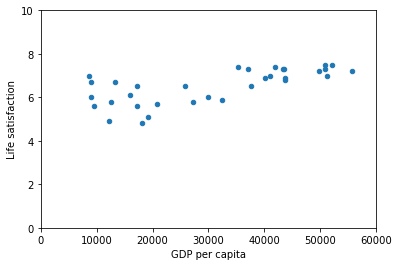

In [9]:
#Visualize the data
full_Country_stats.plot(kind = 'scatter', x= 'GDP per capita',y='Life satisfaction')

plt.axis([0,60000, 0 ,10])
plt.show()

GDP per capita       55805.204
Life satisfaction        7.200
Name: United States, dtype: float64

In [11]:
#select a linear model
from sklearn.linear_model import LinearRegression
lin_reg_model = sklearn.linear_model.LinearRegression()

In [12]:
#train the model

lin_reg_model.fit(X,y)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=1, normalize=False)

In [13]:
#make a prediction for Cyprus

X_new = [[9437.37]] #Turkey GDP

print(lin_reg_model.predict(X_new))

[[ 5.98176297]]


In [14]:
print(full_Country_stats['Life satisfaction']['Turkey'])

5.6
